In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Генерим датасет
from sklearn.datasets import make_moons

dataset = make_moons(n_samples=1000, noise=0.5, random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))), columns=['x1', "x2", "y"])
dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


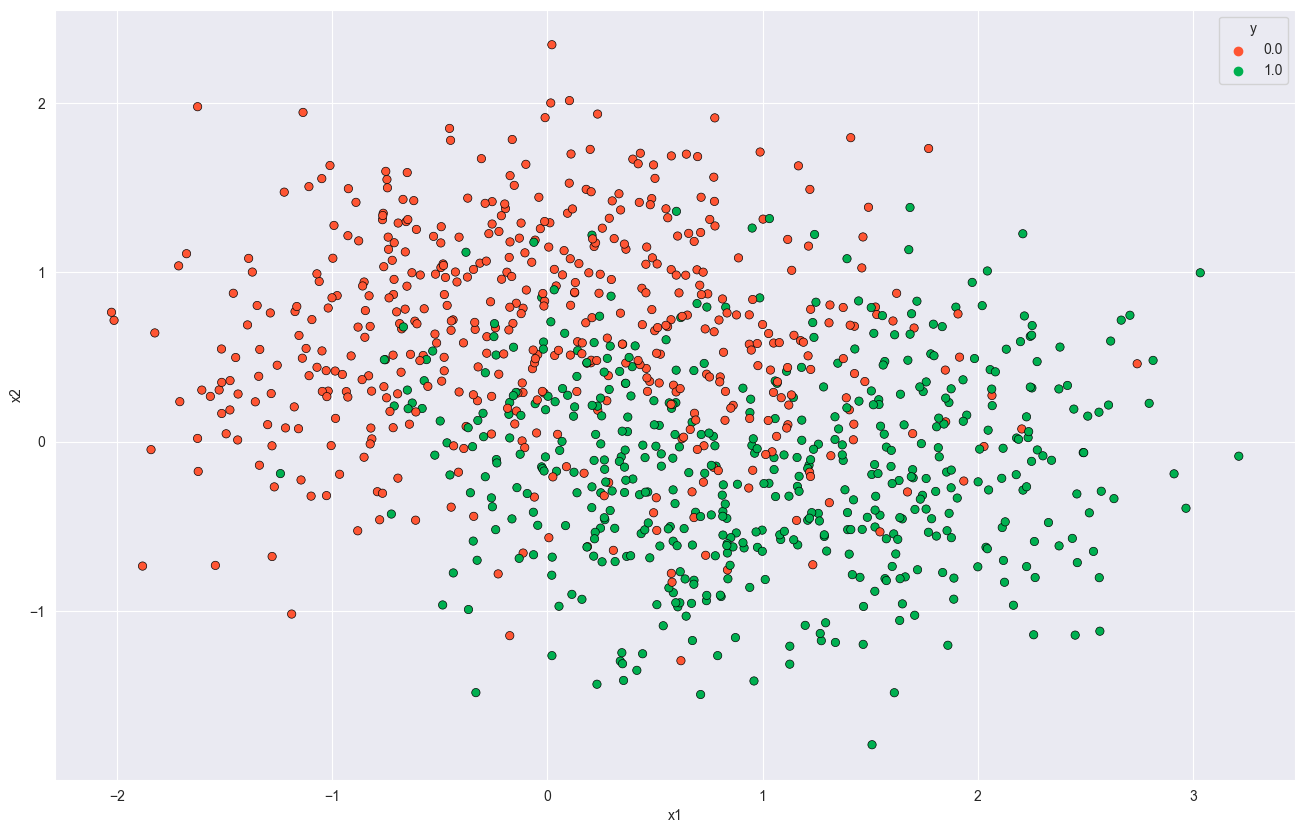

In [6]:
#Изобразим объекты и раскрасим их в классы
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
sns.scatterplot(x="x1", y="x2", hue="y", edgecolor="k", palette=["#FF5533", "#00B050" ], data=dataset)

plt.show()

In [7]:
#Разобьем датасет на объекты и таргеты
X = dataset.drop("y", axis=1)
y = dataset["y"]

#Разделим на трейн и тест

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
#Обучим градиентный бустинг над деревьями
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=500)
#learning_rate - множитель каждой модели в ансамбле моделей
model

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=500)

In [9]:
model.n_estimators

500

In [10]:
def learn_boosting_and_plot(estimator=model, X_tr = X_train, X_te = X_test, Y_tr = y_train, Y_te = y_test):
    pixel_step = 0.02

    X = pd.concat((X_tr, X_te))
    Y = pd.concat((Y_tr, Y_te))

    x1_min, x1_max = X.values[:,0].min() - 1, X.values[:,0].max() - 1
    x2_min, x2_max = X.values[:,1].min() - 1, X.values[:,1].max() - 1

    #Генерим много точек на плоскости

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, pixel_step), np.arange(x1_min, x1_max, pixel_step))
    #обучаем модель на трейне
    estimator.fit(X_tr, Y_tr)

    #считаем качество на обоих фолдах
    accuracy_train = estimator.score(X_tr, Y_tr)
    accuracy_test = estimator.score(X_te, Y_te)

    #Для каждой точки даём прогноз, чтобы покрыть поверхности
    Z = estimator.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    #заполняем пространство
    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    #Рисуем точечки и обученные области

    for i, n, c in zip(range(2), model.classes_, ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(X.values[idx, 0], X.values[idx, 1], c=c, s=20, edgecolor='k', label="Class %s" % n,)
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.legend(loc="upper right")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Boosting with {estimator.n_estimators} estimators")
        return accuracy_train, accuracy_test

E:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


(1.0, 0.755)

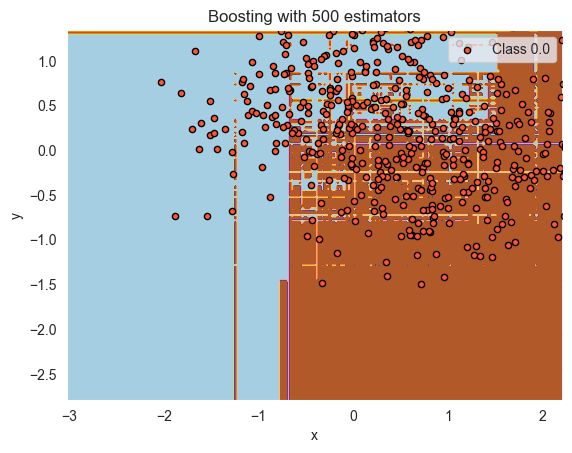

In [11]:
learn_boosting_and_plot(model)